# scikit-learnのトレーニング♨

## 環境準備、共通的データ処理 編

## [目次](TableOfContents.ipynb)
- [環境準備](#環境準備)
  - [インストール](#インストール)
  - [インポート](#インポート)
  - [プロキシ設定](#プロキシ設定)
- [共通的データ処理](#共通的データ処理)
  - [生成](#生成)
  - [加工](#加工)
  - [理解](#理解)
  - [準備](#準備)

## 参考
開発基盤部会 Wiki
- データマイニング（DM）- Python  
https://dotnetdevelopmentinfrastructure.osscons.jp/index.php?%E3%83%87%E3%83%BC%E3%82%BF%E3%83%9E%E3%82%A4%E3%83%8B%E3%83%B3%E3%82%B0%EF%BC%88DM%EF%BC%89-%20Python#y4054d35

## 環境準備

### インストール

In [ ]:
!pip install scikit-learn # scikit-learn
!pip install openpyxl # Excel読込用
!pip install seaborn # 散布図表示用
!pip install mlxtend # 分類可視化用

### インポート

#### 基本的なライブラリ

In [2]:
import io
import requests

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### scikit-learn

##### 前処理

In [3]:
from sklearn import datasets                                 # サンプル・データセット
from sklearn.datasets import make_regression                 # 回帰データセット作成
from sklearn.datasets import make_blobs                      # 分類データセット作成
from sklearn.preprocessing import StandardScaler             # 標準化
from sklearn.model_selection import train_test_split         # データ分割

##### モデル

In [4]:
from sklearn.linear_model import LinearRegression            # 線形回帰
from sklearn.preprocessing import PolynomialFeatures         # 多項式回帰の変数変換
from sklearn.linear_model import Ridge                       # 多項式回帰のRidge回帰
from sklearn.linear_model import Lasso                       # 多項式回帰のLASSO回帰
from sklearn.linear_model import ElasticNet                  # 多項式回帰のLASSO回帰
from sklearn.linear_model import Perceptron                  # 単純パーセプトロン線形分類器
from sklearn.linear_model import LogisticRegression          # ロジスティク回帰
from sklearn.svm import SVC                                  # サポートベクターマシン（SVM）分類器
from sklearn.tree import DecisionTreeClassifier              # 決定木（分類木）
from sklearn.ensemble import RandomForestClassifier          # ランダムフォレスト（分類木）
from sklearn.ensemble import GradientBoostingClassifier      # 勾配ブースティング木（分類木）
from sklearn.decomposition import PCA                        # 主成分分析
from sklearn.cluster import KMeans                           # k-means法 クラスタ分析
from sklearn.feature_extraction.text import CountVectorizer  # 自然言語処理ベクトル化
from sklearn.feature_extraction.text import TfidfTransformer # 自然言語ベクトルのTF-IDF計算
from sklearn.decomposition import LatentDirichletAllocation  # 自然言語ベクトルからLDAトピック抽出

##### 精度評価

In [5]:
from sklearn import metrics                                  # モデル評価
from sklearn.metrics import mean_squared_error as mse        # 精度評価（mse）
from sklearn.metrics import confusion_matrix                 # 混同行列
from sklearn.metrics import silhouette_samples               # シルエット係数
from sklearn.model_selection import cross_val_score          # 交差検証法
from sklearn.model_selection import KFold                    # k分割交差検証法
from sklearn.model_selection import StratifiedKFold          # 層化交差検証法
from sklearn.model_selection import GridSearchCV             # グリッドサーチ

#### その他

##### 可視化

In [6]:
import seaborn as sns                                       # matplotlibラッパ
from mlxtend.plotting import plot_decision_regions          # 決定領域表示関数
from matplotlib import cm                                   # カラーマップ処理

##### その他

In [7]:
from numpy import linalg as LA # 線形代数ライブラリ

In [8]:
import warnings
warnings.filterwarnings('ignore')

### プロキシ設定

In [9]:
import os
proxies = {
    "http": os.getenv("HTTP_PROXY"),
    "https": os.getenv("HTTPS_PROXY")
}

### jupyter上で利用するとき

In [10]:
%matplotlib inline

## 共通的データ処理
- 以下の共通的な処理では、何らかのデータをロードしてから試す。
- 赤ワインの品質：回帰または分類モデリングのためのシンプルでクリーンな実践用データセット

### 生成

#### テストデータの作成

##### 回帰データセット

###### 生成

In [11]:
x, y, coef = make_regression(random_state=12, 
                       n_samples=100,   # サンプル数 100
                       n_features=4,    # 特徴量の数 4
                       n_informative=2, # 目的変数に相関の強い特徴量の数 2
                       noise=10.0,      # ノイズ 10.0
                       bias=-0.0,
                       coef=True)

In [12]:
# 相関係数
coef

array([ 0.        , 88.25898063, 63.26534186,  0.        ])

###### 表示

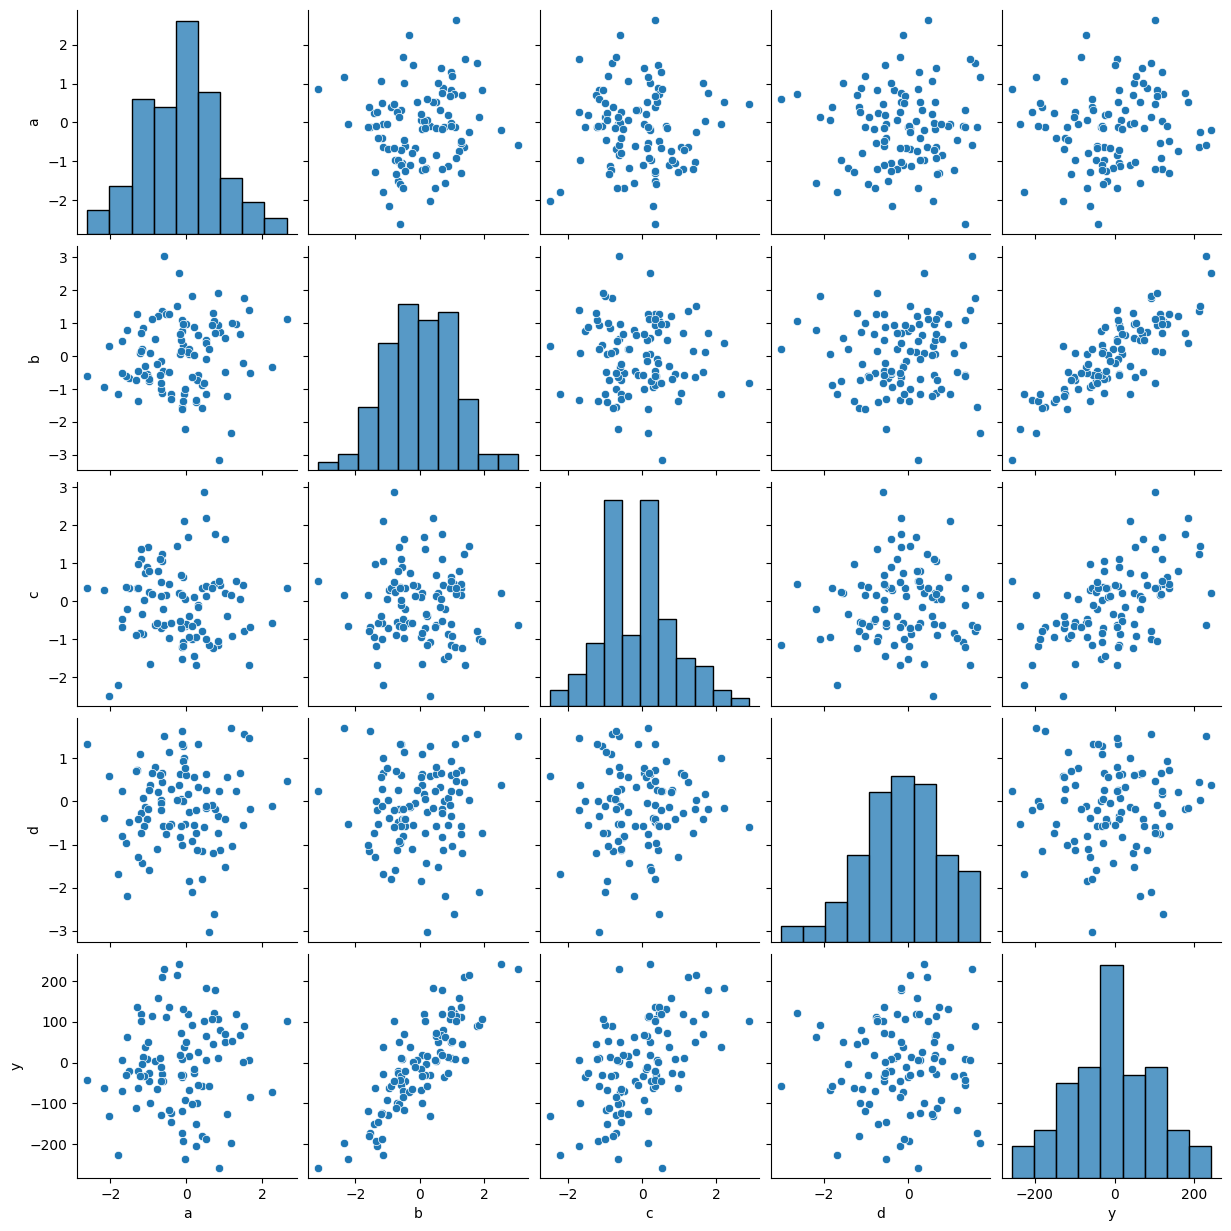

In [13]:
df_x=pd.DataFrame(x,columns=['a','b','c','d'])
df_y=pd.DataFrame(y,columns=['y'])
df=pd.concat([df_x, df_y],axis=1)

sns.pairplot(df)
plt.show()

##### 分類データセット

###### 生成

In [14]:
x, y = make_blobs(random_state=8,
                  n_samples=100,   # サンプル数 100
                  n_features=2,    # 特徴量の数を 2
                  cluster_std=1.5, # 標準偏差
                  centers=3)       # 塊数を3

###### 表示

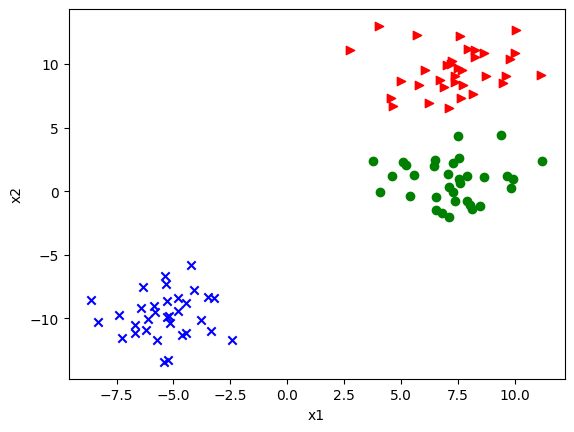

In [15]:
# 関数
def cluster_plot(n_clusters, x, y):
    plt.figure()
    for target, marker, color in zip(range(3), '>ox', 'rgb'): # 3値分類
        # y==targetで、boolのnumpy.ndarrayベクトルが返るのでコレで行を指定している。
        plt.scatter(x[y==target, 0], x[y==target, 1], marker=marker, color=color)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()

# 散布
cluster_plot(3, x, y)

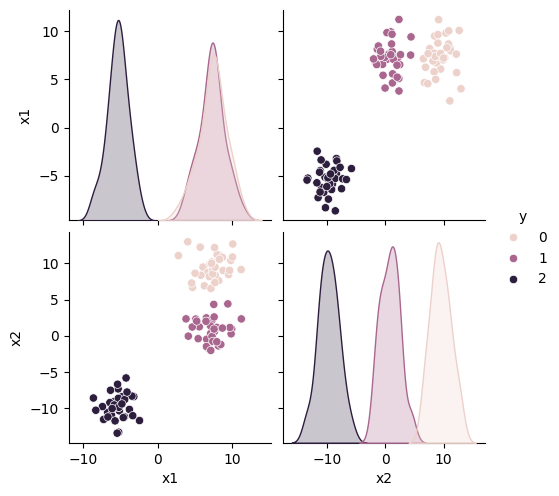

In [16]:
# sns.pairplotで
df1=pd.DataFrame(x,columns=['x1','x2'])
df2=pd.DataFrame(y,columns=['y'])
df=pd.concat([df1,df2],axis=1)
sns.pairplot(df, hue='y')
plt.show()

##### 関数で近似できるデータセット

###### 適当な関数を定義

In [17]:
def GenerateData0(x):
    y = 0.0001 * (x**3 + x**2 + x + 1)
    return y

###### 関数上のプロット

In [18]:
# xの範囲を指定
x_plot = np.arange(-25, 25, 0.1)
# yを関数で指定
y_plot = GenerateData0(x_plot)
# 機械学習用に変換
x_plot = x_plot.reshape(-1, 1)

###### サンプルの生成

In [19]:
# 乱数生成器の状態を指定
np.random.seed(3)
# 正規分布に従ってX個のデータ点を生成
X = 30
x = np.random.normal(0, 10, X)
# 対応するyを関数で生成
y = GenerateData0(x)
# 正規分布に従うノイズを加える
y += np.random.normal(0, 0.25, len(y))
# 機械学習用に変換
x = x.reshape(-1, 1)

###### 関数の描画と散布図で可視化

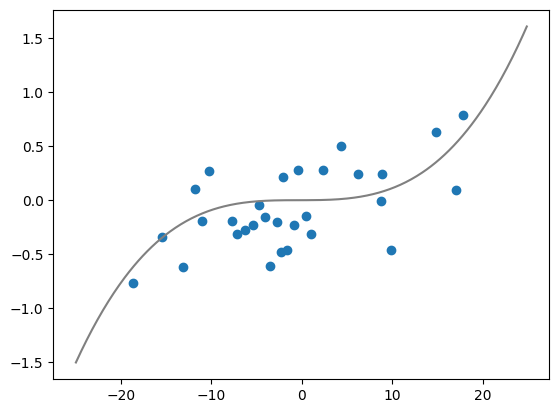

In [20]:
# 関数を描画
plt.plot(x_plot, y_plot, color='gray')
# サンプルを散布
plt.scatter(x, y)
# グラフを表示
plt.show()

#### 以下の手順で使用するデータのロード（Webから
必要に応じて[環境変数にプロキシ設定](#プロキシ設定)をしておくと良い。

In [21]:
url = 'https://dotnetdevelopmentinfrastructure.osscons.jp/index.php?plugin=attach&pcmd=open&file=winequality-red.csv&refer=FrontPage'
res = requests.get(url) # , verify=False, proxies=proxies) # プロキシ
df = pd.read_csv(io.BytesIO(res.content), encoding='shift-jis', sep=";")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### 加工
切出や結合など。

### 理解

#### 基本統計量
https://dotnetdevelopmentinfrastructure.osscons.jp/index.php?%E3%83%87%E3%83%BC%E3%82%BF%E5%88%86%E6%9E%90#j6ea2557

In [22]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#### 相関
目的変数と相関の強い説明変数を調査。

##### 相関係数（相関行列）
コレだと数値の和列で解り難い。  
https://dotnetdevelopmentinfrastructure.osscons.jp/index.php?%E7%B5%B1%E8%A8%88%E8%A7%A3%E6%9E%90#bad01586

In [23]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


##### ヒートマップに表示
ヒートマップにすると相関の強弱が解り易い。

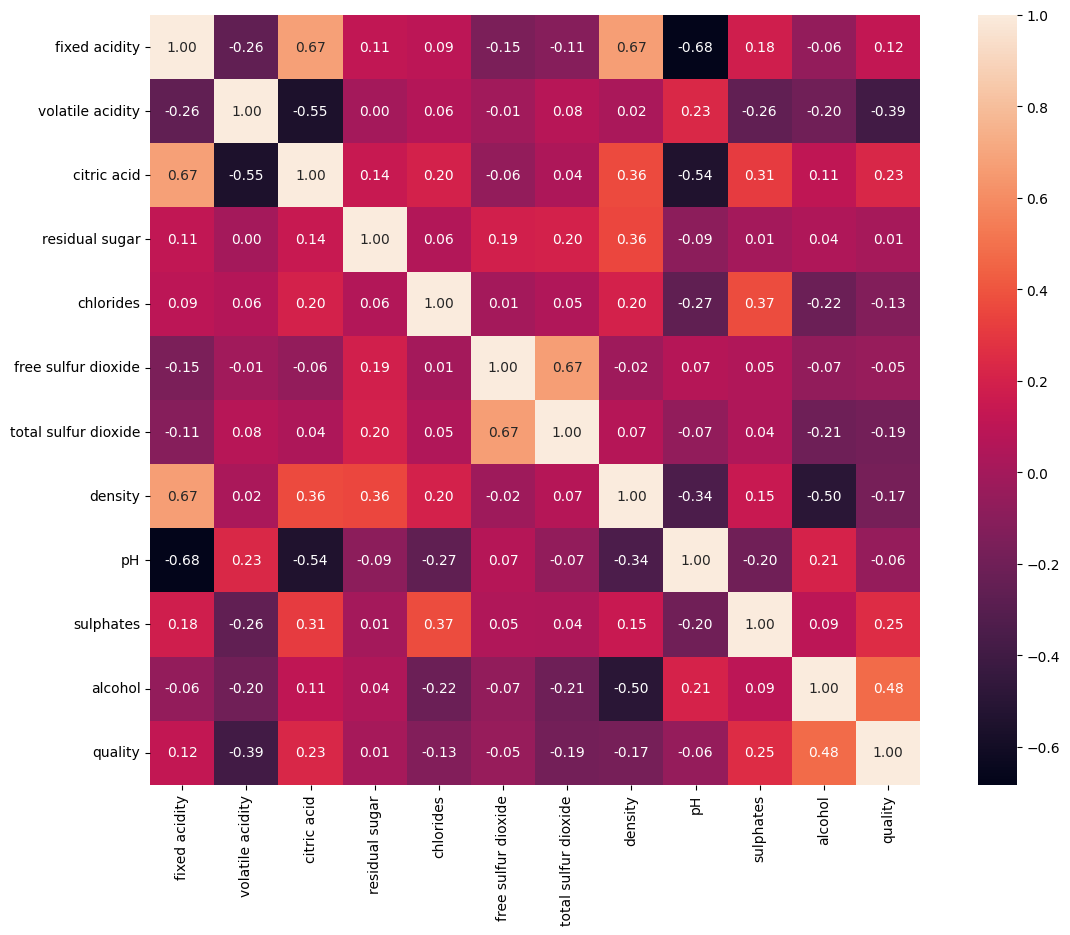

In [24]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, square=True, fmt='.2f')
plt.show()

##### 散布図行列

###### 通常

In [25]:
# 列数が多いとハングするので注意。
#sns.pairplot(df)
#plt.show()

###### 不要な列を削除して

In [26]:
# 列名の確認
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [27]:
#df2=df.drop(['削除する','列名の','リスト'], axis=1)
df2=df.drop(['volatile acidity','citric acid','residual sugar','chlorides',
             'free sulfur dioxide','total sulfur dioxide','sulphates'], axis=1)

###### 散布図行列を表示

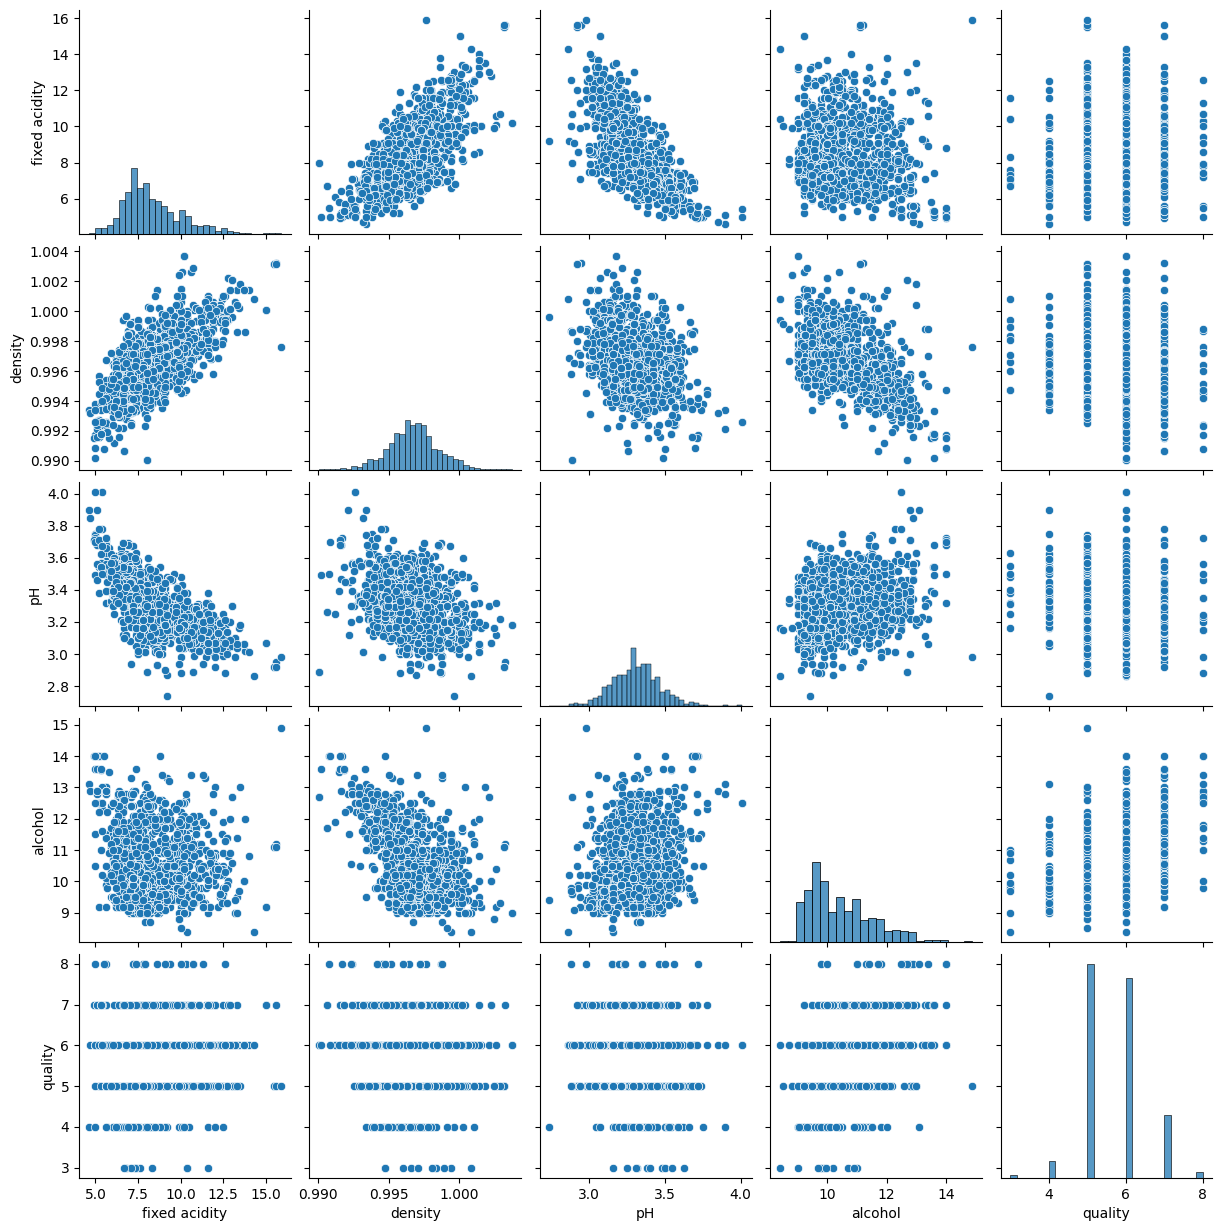

In [28]:
sns.pairplot(df2)
plt.show()

###### カテゴリ分類した散布図行列を表示

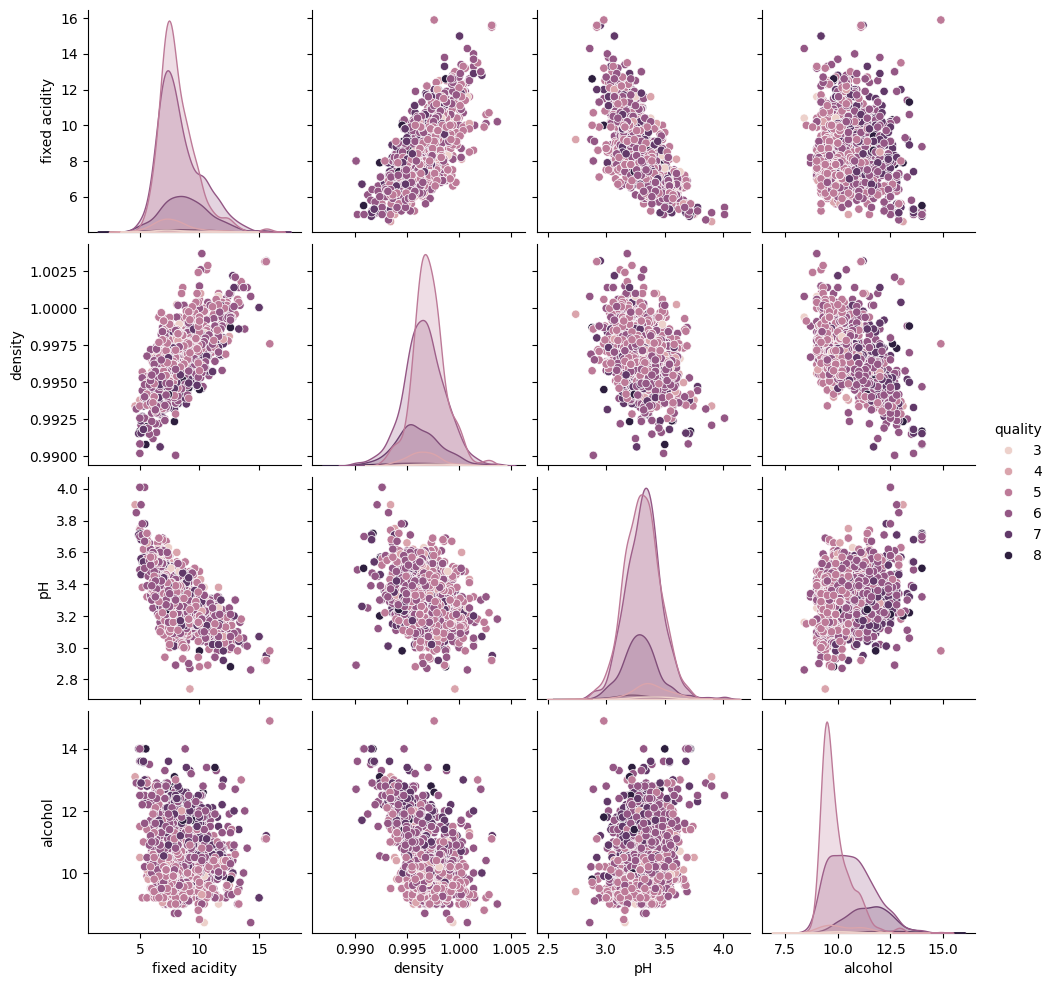

In [29]:
sns.pairplot(df2, hue='quality')
plt.show()

###### 散布図行列で特徴量を選択
- 回帰の場合、目的変数と相関関係が高い説明変数を選択する。
- 分類の場合、目的変数を空間上で分離できそうな説明変数を選択する。
- 相関関係が高い説明変数同士は問題を起こす可能性（マルチコ）。

##### 欠損率の計算と確認

In [30]:
df.isnull().sum() / len(df) 

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

### 準備

#### [データのクリーニング](PandasTraining.ipynb)
- リストワイズ法（削除）
- ペアワイズ法（削除）
- 補完値で置換

#### [データの構築・統合](PandasTraining.ipynb)
- 単一属性変換
  - カテゴリ → 数値
  - 数値 → カテゴリ
- One-Hotエンコーディング
  - [NumPyの場合、to_categoricalを使う。](NumPyTraining3.ipynb)
  - [Pandasの場合、get_dummiesを使う。](PandasTraining.ipynb)（基本コッチ

#### （PG上ある）
CRIPS-DM上には明記されていないが、PG的に必要。

##### 説明変数・目的変数の選択・分割

##### 取り敢えず以下のサンプルを使う。

###### DFでやるか

In [31]:
df_x = df2.loc[:, ['alcohol']]
df_y = df2.loc[:, ['quality']]
x1 = np.array(df_x)
y1 = np.array(df_y)

###### NPでやるか

In [32]:
xy = np.array(df2)
xy.shape

(1599, 5)

In [33]:
x2 = xy[:, 3:4]
y2 = xy[:, 4:5]

###### 比較してチェック

In [34]:
print(np.allclose(x1, x2))
print(np.allclose(y1, y2))

True
True


In [35]:
x=x1
y=y1

##### 標準化・正規化
DFでやる方法とNPでやる方法があるが、
[説明変数と目的変数の選択・分割](#説明変数・目的変数の選択・分割)の後なので基本NPでやる。

In [36]:
# 平均
print(x.mean())

10.422983114446529


In [37]:
# 標準偏差
print(x.std())

1.0653343003437483


###### 標準化

In [38]:
ss = StandardScaler()
# 引数は numpy.ndarray
sx = ss.fit_transform(x)

In [39]:
# 平均が ≒ 0
print(sx.mean())

1.0664806540489309e-16


In [40]:
# 標準偏差が ≒ 1
print(sx.std())

1.0


###### 正規化

In [41]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler(feature_range=(0, 1))
# 引数は numpy.ndarray
mmsx = mms.fit_transform(x)

In [42]:
# 平均が0-1の間に。
print(mmsx.mean())

0.31122817145331216


In [43]:
# 標準偏差は
print(mmsx.std())

0.16389758466826895


##### 学習・テストデータの分割

###### ホールド・アウト法
- test_size = 0.3  
train:test = 7:3 で分割。
- random_state = 0  
毎回同じサンプルに分割

In [44]:
# 学習・テストデータの分割（ホールド・アウト法
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

# データ分割の結果確認
# (numpy.ndarray).shapeメソッドで確認できる。
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1119, 1)
(1119, 1)
(480, 1)
(480, 1)


###### 交差検証法については[コチラ](ScikitLearnTraining5.ipynb)